# ELEC474 Prelab3
### please check the concole while running
##### Set all the t val for General and Canny then pree ENTER to see result 
##### Press C to start compare with the current Value you choose on Canny 's trackbar
##### Press ESC to see the plots

In [1]:
import cv2 as cv
import numpy as np
import random
import math
import time
from matplotlib import pyplot as plt

## Initalizations 

In [2]:
global img1Name,img2Name
global windowName_1,windowName_2
global trackbarName_1,trackbarName_2,trackbarName_3
global trackbarValRange_1,imgTitle,CompareEdgeGeneral_tVal,pBarLength

img1Name = "spiral.jpg"
# img1Name = "lines.jpg"       #uncomment this to check line image
# img1Name = "AnimeLenna.jpg"  #uncomment this to check personal image
windowName_1 = "Prelab3_GenralEdgeDetection_20119641"
windowName_2 = "Prelab3_ CannyEdgeDetection_20119641"

trackbarName_1 = "t Value"
trackbarName_2 = "T1 Value"
trackbarName_3 = "T2 Value"
trackbarValRange_1 = [0,255]          #the range for trackbar for all t threshold 
CompareEdgeGeneral_tVal = [1,255,10]  #the range for threshold to General edge detection, for comparing with Canny,the third value is steps


imgTitle = np.array((
"Sobel Horizontal Image",
"Sobel Vertical Image",
"Gradient Image",
"General Output Image",
"Comparison of General and Canny Edge Detectors"    
))


#performance param
pBarLength = 50         #num of square for progression bar, performance use


In [3]:
def GeneralEdgeDetection(img,imgSize,t):
    
    if t == 0:
        print("Invalide threshold, reset to t = 18")
        t = 18
    imgGray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    # plt.subplot(4,1,3)
    # plt.imshow(cv.cvtColor(imgGray,cv.COLOR_BGR2RGB))
    # plt.title("Original Image")
    imgGray = cv.GaussianBlur(imgGray,(5,5),10)
    # plt.subplot(4,1,4)
    # plt.imshow(cv.cvtColor(imgGray,cv.COLOR_BGR2RGB))
    # plt.title("GaussianBlur Original Image")

    #filtering x and y 
    kernelX = np.array((
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]        
    ),dtype="float64")

    kernely = np.array((
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]        
    ),dtype="float64")

    imgGx = cv.filter2D(imgGray,cv.CV_16S,kernelX)
    imgGy = cv.filter2D(imgGray,cv.CV_16S,kernely)

    # imgUnion = cv.addWeighted(imgGx,0.5,imgGy,0.5,0)
    imgUnion = np.absolute(imgGx) + np.absolute(imgGy)



    imgOut = np.zeros((imgSize[0],img1Size[1]),dtype = np.uint8)
    for x in range(imgSize[0]):
        for y in range(imgSize[1]):
            if imgUnion[x][y] > t:
                imgOut[x][y] = np.uint8(255)

    imgPltSum = []
    imgPltSum.append(imgGx)
    imgPltSum.append(imgGy)
    imgPltSum.append(imgUnion)
    imgPltSum.append(imgOut) #keep this in the last one
    return imgPltSum

In [4]:
def CannyEdgeDetection(img, imgSize,t2, t3):
    imgGray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    imgGaussian = cv.GaussianBlur(imgGray,(5,5),10)
    imgCanny = cv.Canny(imgGaussian,t2,t3)
    return imgCanny

In [5]:
def CompareMetricCallDiff(imgGeneral,imgCanny,imgSize,i): #return 1 if all pixel are identical and 0.5 if half are the same
#     cv.imshow("G = "+str(i),imgGeneral)
#     cv.imshow("C = "+str(i),imgCanny)
    numSamePix = 0
    numNonSamePix = 0
    for x in range(imgSize[0]):
        for y in range(imgSize[1]):
            if imgGeneral[x][y] == 0 and imgCanny[x][y] == 0:
                    numSamePix += 1
            if imgGeneral[x][y] == 255 and imgCanny[x][y] == 255:
                    numNonSamePix += 1
#     print("for i = ",i," \npixel in G 0 = ",a,"255 = ",b)
#     print("pixel in C 0 = ",c,"255 = ",d)
    return (numSamePix + numNonSamePix) / (imgSize[0]*imgSize[1])

In [6]:
def CompareMetricMain(img,imgSize,rangeGeneral):
    metricCompare = []   #store all the diff for compareMetric
    imgGeneral = []     #stroe all the general edge for diffrent t
    print("Generating General Edge detection")
    imgCannyLocal = CannyEdgeDetection(img,imgSize,t_2,t_3)
    for t in range(rangeGeneral[0],rangeGeneral[1]+1):       #obtain all genearl edge img which all t
        #performance
        pctge = (t - rangeGeneral[0]) / (rangeGeneral[1] - rangeGeneral[0])
        temp = int(round(pBarLength * pctge))
        print("\r"+(temp-1)*'█'+'█'+(pBarLength-temp)*'░'+str(round(pctge*100))+'%'+" For t ="+str(t),end=' ')
        
        #core func
        if t %(rangeGeneral[2]) == 0:
            temp2 = GeneralEdgeDetection(img,imgSize,t)[3]
#             cv.imshow("t = "+str(t),temp2)
            imgGeneral.append(temp2)
            
    print("\nFINISH\n")
    print("Calculating Difference Between General and Canny:")
    for i in range(len(imgGeneral)):    #obtain all diff between given canny and different t for general
        #performance
        pctge = (i+1) / len(imgGeneral)
        temp = int(round(pBarLength * pctge))
        print("\r"+(temp-1)*'█'+'█'+(pBarLength-temp)*'░'+str(round(pctge*100))+'%',end=' ') 
        
        #core func
        metricCompare.append(CompareMetricCallDiff(imgGeneral[i],imgCannyLocal,imgSize,i))
    print("\nFINISH\n"+20*'*'+"\nStart Ploting\n"+20*'*')
    CompareMetricPlt(rangeGeneral,metricCompare,"t in General Edge Detection",
                                                "Similarity ratio",
                                                "Similarity ratio trend",
                                                imgTitle[-1])
    print("\nFINISH\nPress ESC to check it on console")
    

In [7]:
def PltImg(img,imgDescipt):
    plt.figure(dpi=300)
    plt.figure(figsize=(15,15))
    idx = len(img)
    for i in range(len(img)):
        plt.subplot(idx,1,i+1)
        plt.imshow(img[i],cmap="gray")
        plt.title(imgDescipt[i])
    plt.tight_layout()

In [8]:
def CompareMetricPlt(x, y, xLabel, yLabel,dataLabel,title):
    plt.figure(dpi=200)
    plt.figure(figsize=(5,5))
    
#     print("x data: ",x,"\n")
#     print("y data: ",y,"\n")
    mX = []
    mY = y
    
    for i in range(x[0],x[1]+1):
        if i%x[2] == 0:
            mX.append(i)
    
    #plot line
    plt.plot(mX,mY,'g--',label = dataLabel)
    #plot point 
    plt.plot(mX,mY,'g+-')

    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend()

    plt.tight_layout()

In [9]:
def TrackbarCallback(*args):
    global t_1,t_2,t_3
    t_1 = cv.getTrackbarPos(trackbarName_1,windowName_1)
    t_2 = cv.getTrackbarPos(trackbarName_2,windowName_2)
    t_3 = cv.getTrackbarPos(trackbarName_3,windowName_2)
    

In [10]:
def initTrackbar():
    #image 1
    cv.namedWindow(windowName_1, cv.WINDOW_NORMAL)
    cv.resizeWindow(windowName_1,img1Size[1], img1Size[0])
    cv.createTrackbar(trackbarName_1, windowName_1, trackbarValRange_1[0],trackbarValRange_1[1], TrackbarCallback)

    cv.namedWindow(windowName_2, cv.WINDOW_NORMAL)
    cv.resizeWindow(windowName_2,img1Size[1], img1Size[0])
    cv.createTrackbar(trackbarName_2, windowName_2, trackbarValRange_1[0],trackbarValRange_1[1], TrackbarCallback)

    cv.namedWindow(windowName_2, cv.WINDOW_NORMAL)
    cv.resizeWindow(windowName_2,img1Size[1], img1Size[0])
    cv.createTrackbar(trackbarName_3, windowName_2, trackbarValRange_1[0],trackbarValRange_1[1], TrackbarCallback)

Welcome

Instruction
press ESC to exit the program
After select values, press ENTER to start General and Canny Edge Detection
press C to start comparison
********************
EDGE DETECTION
********************
Start General Edge detection with t =  51
Start Canny Edge detection with t1 =  7  t2 =  51
********************
COMPARE EDGE DETECTION METHOD
********************
Your current t1,t2 for Canny is : 7 51 

Start comparing
Generating General Edge detection
██████████████████████████████████████████████████████████████████████100% For t =255 
FINISH

Calculating Difference Between General and Canny:
██████████████████████████████████████████████████████████████████████100% 
FINISH
********************
Start Ploting
********************

FINISH
Press ESC to check it on console

Program Break with ECS
check plt image on consel


<Figure size 1200x800 with 0 Axes>

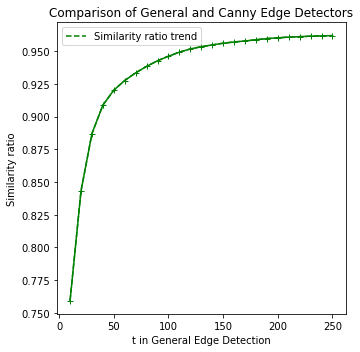

<Figure size 1800x1200 with 0 Axes>

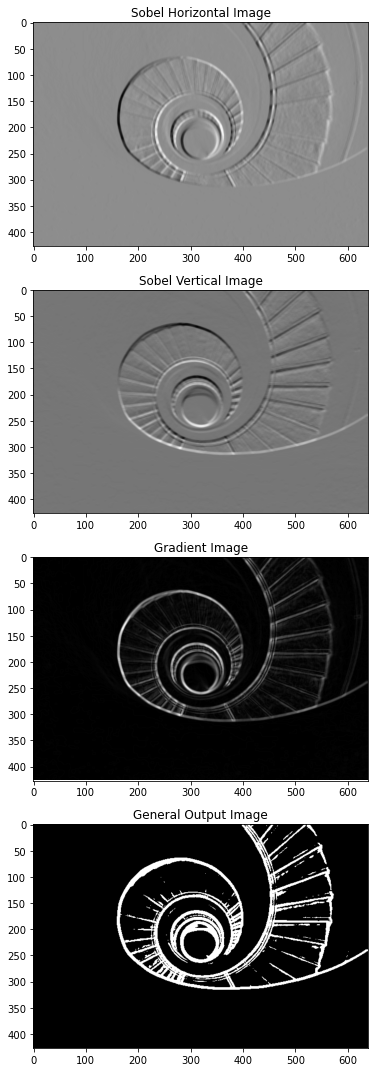

In [11]:
img1 = cv.imread(img1Name)
# img2 = cv.imread(img2Name)
img1Size = [img1.shape[0],img1.shape[1]]
# img2Size = [img2.shape[0],img2.shape[1]]

initTrackbar()

global t_1,t_2,t_3
t_1 = 18
t_2 = 7
t_3 = 51

cv.imshow(windowName_1,img1)
cv.imshow(windowName_2,img1)
imgPltSum = []
print(50*'=',"\nWelcome\n")
print("Instruction\npress ESC to exit the program")
print("After select values, press ENTER to start General and Canny Edge Detection")
print("press C to start comparison")
while True:
    key = cv.waitKey(1)
    if key == 27: #press ESC to exit the program
        print("\nProgram Break with ECS\ncheck plt image on consel\n"+50*'=')
        break
    if key == 13: #press ENTER to start
        print(20*'*'+"\nEDGE DETECTION\n"+20*'*')
        print("Start General Edge detection with t = ", t_1)
        print("Start Canny Edge detection with t1 = ", t_2, " t2 = ", t_3)
        imgPltSum = GeneralEdgeDetection(img1,img1Size,t_1)
        imgCanny = CannyEdgeDetection(img1,img1Size,t_2,t_3)

        #cv show image
        cv.imshow(windowName_1,imgPltSum[-1])
        cv.imshow(windowName_2,imgCanny)
    if key == 99: #press 'C' to start comparison
        print(20*'*'+"\nCOMPARE EDGE DETECTION METHOD\n"+20*'*')
        print("Your current t1,t2 for Canny is :",t_2,t_3,"\n")
        print("Start comparing")
        CompareMetricMain(img1,img1Size,CompareEdgeGeneral_tVal)
if imgPltSum == []:
    imgPltSum = GeneralEdgeDetection(img1,img1Size,0)
PltImg(imgPltSum,imgTitle)
cv.destroyAllWindows()